In [1]:
# There is no need to import the random module ... 
# if we import the NumPy module, as it's redundant.

import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import requests

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

import gmaps

In [2]:
# some random generating functions
# randint(-90,90)
# random() between 0 and 1.0
# randrange (-90, 90, step = 1)
# uniform (-90, 90) returns a floating-point decimal number

In [3]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
city_weather.text #sentence

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":73.08,"feels_like":73.42,"temp_min":67.26,"temp_max":76.15,"pressure":1017,"humidity":71},"visibility":10000,"wind":{"speed":5.99,"deg":0,"gust":10},"clouds":{"all":40},"dt":1661484142,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1661421730,"sunset":1661470255},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 73.08,
  'feels_like': 73.42,
  'temp_min': 67.26,
  'temp_max': 76.15,
  'pressure': 1017,
  'humidity': 71},
 'visibility': 10000,
 'wind': {'speed': 5.99, 'deg': 0, 'gust': 10},
 'clouds': {'all': 40},
 'dt': 1661484142,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1661421730,
  'sunset': 1661470255},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
# Get the JSON data.
boston_data = city_weather.json()

In [14]:
boston_data["sys"]["country"]

'US'

In [15]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 76.15 71 40 5.99


In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kisaran
Processing Record 2 of Set 1 | rocha
Processing Record 3 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | natal
Processing Record 6 of Set 1 | san quintin
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | fort nelson
Processing Record 10 of Set 1 | la solana
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | deputatskiy
Processing Record 14 of Set 1 | seidu
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | alencon
Processing Record 19 of Set 1 | borgarnes
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | sakakah
Processing Record 22 of Set 1 | nanortalik
Processing R

Processing Record 39 of Set 4 | sitka
Processing Record 40 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 | hovd
Processing Record 42 of Set 4 | alice springs
Processing Record 43 of Set 4 | srednekolymsk
Processing Record 44 of Set 4 | constitucion
Processing Record 45 of Set 4 | olafsvik
Processing Record 46 of Set 4 | santa maria
Processing Record 47 of Set 4 | tarabha
Processing Record 48 of Set 4 | verkhoyansk
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | vikindu
Processing Record 1 of Set 5 | lasa
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | madarounfa
Processing Record 4 of Set 5 | harnosand
Processing Record 5 of Set 5 | nemuro
Processing Record 6 of Set 5 | kahului
Processing Record 7 of Set 5 | bilibino
Processing Record 8 of Set 5 | doha
Processing Record 9 of Set 5 | iranshahr
Processing Record 10 of Set 5 | brownsville
Processing Record 11 of Set 5 | morgan city
Processing Record 

Processing Record 25 of Set 8 | vao
Processing Record 26 of Set 8 | khonuu
City not found. Skipping...
Processing Record 27 of Set 8 | namibe
Processing Record 28 of Set 8 | chernyshevskiy
Processing Record 29 of Set 8 | cairns
Processing Record 30 of Set 8 | drumnadrochit
Processing Record 31 of Set 8 | shingu
Processing Record 32 of Set 8 | pavilosta
Processing Record 33 of Set 8 | mendeleyevo
Processing Record 34 of Set 8 | dickinson
Processing Record 35 of Set 8 | kieta
Processing Record 36 of Set 8 | suleja
Processing Record 37 of Set 8 | pinega
Processing Record 38 of Set 8 | phalodi
Processing Record 39 of Set 8 | katha
City not found. Skipping...
Processing Record 40 of Set 8 | udaipura
Processing Record 41 of Set 8 | amalapuram
Processing Record 42 of Set 8 | andenes
Processing Record 43 of Set 8 | iqaluit
Processing Record 44 of Set 8 | acu
Processing Record 45 of Set 8 | bogande
Processing Record 46 of Set 8 | aswan
Processing Record 47 of Set 8 | makinsk
Processing Record 4

City not found. Skipping...
Processing Record 10 of Set 12 | najran
Processing Record 11 of Set 12 | vila velha
Processing Record 12 of Set 12 | broken hill
Processing Record 13 of Set 12 | izumo
Processing Record 14 of Set 12 | grootfontein
Processing Record 15 of Set 12 | santa cruz
Processing Record 16 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 17 of Set 12 | hokitika
Processing Record 18 of Set 12 | mangit
Processing Record 19 of Set 12 | ahipara
Processing Record 20 of Set 12 | katsuura
Processing Record 21 of Set 12 | kargasok
Processing Record 22 of Set 12 | karpogory
Processing Record 23 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 24 of Set 12 | yeniseysk
Processing Record 25 of Set 12 | basco
Processing Record 26 of Set 12 | hay river
Processing Record 27 of Set 12 | viedma
Processing Record 28 of Set 12 | rasulnagar
Processing Record 29 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 30 of Set 12 | klyu

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kisaran,2.9845,99.6158,82.18,70,100,2.28,ID,2022-08-26 03:23:42
1,Rocha,-34.4833,-54.3333,60.35,98,87,4.41,UY,2022-08-26 03:23:43
2,Albany,42.6001,-73.9662,71.06,89,53,3.09,US,2022-08-26 03:23:45
3,Natal,-5.7950,-35.2094,73.62,83,0,5.75,BR,2022-08-26 03:22:32
4,San Quintin,30.4833,-115.9500,71.69,84,1,7.94,MX,2022-08-26 03:23:45
5,Tuktoyaktuk,69.4541,-133.0374,53.60,100,100,9.22,CA,2022-08-26 03:23:46
6,Fort Nelson,58.8053,-122.7002,78.39,50,75,5.75,CA,2022-08-26 03:23:47
7,La Solana,38.9442,-3.2381,70.56,44,2,2.86,ES,2022-08-26 03:23:47
8,Kaitangata,-46.2817,169.8464,53.35,54,0,2.59,NZ,2022-08-26 03:23:48
9,Lebu,-37.6167,-73.6500,46.26,86,88,16.40,CL,2022-08-26 03:23:48


In [19]:
new_column_order = ["City", "Cloudiness","Country","Date",
                    "Humidity","Lat","Lng","Max Temp","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kisaran,100,ID,2022-08-26 03:23:42,70,2.9845,99.6158,82.18,2.28
1,Rocha,87,UY,2022-08-26 03:23:43,98,-34.4833,-54.3333,60.35,4.41
2,Albany,53,US,2022-08-26 03:23:45,89,42.6001,-73.9662,71.06,3.09
3,Natal,0,BR,2022-08-26 03:22:32,83,-5.7950,-35.2094,73.62,5.75
4,San Quintin,1,MX,2022-08-26 03:23:45,84,30.4833,-115.9500,71.69,7.94
5,Tuktoyaktuk,100,CA,2022-08-26 03:23:46,100,69.4541,-133.0374,53.60,9.22
6,Fort Nelson,75,CA,2022-08-26 03:23:47,50,58.8053,-122.7002,78.39,5.75
7,La Solana,2,ES,2022-08-26 03:23:47,44,38.9442,-3.2381,70.56,2.86
8,Kaitangata,0,NZ,2022-08-26 03:23:48,54,-46.2817,169.8464,53.35,2.59
9,Lebu,88,CL,2022-08-26 03:23:48,86,-37.6167,-73.6500,46.26,16.40


In [20]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        554 non-null    object 
 1   Cloudiness  554 non-null    int64  
 2   Country     554 non-null    object 
 3   Date        554 non-null    object 
 4   Humidity    554 non-null    int64  
 5   Lat         554 non-null    float64
 6   Lng         554 non-null    float64
 7   Max Temp    554 non-null    float64
 8   Wind Speed  554 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 39.1+ KB


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

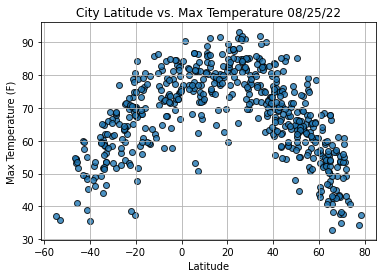

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

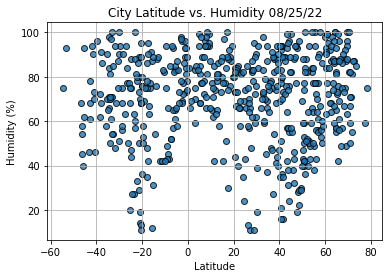

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

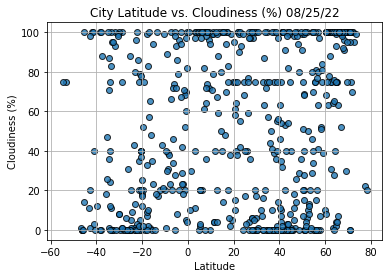

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

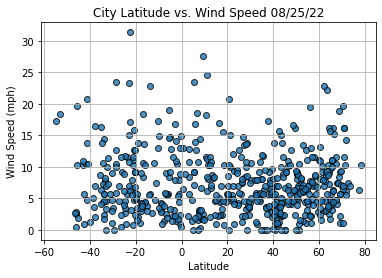

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"r = {r_value:.3f}")

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

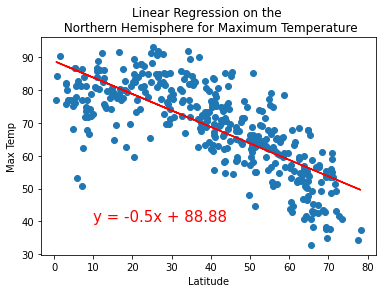

r = -0.748


In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,40))

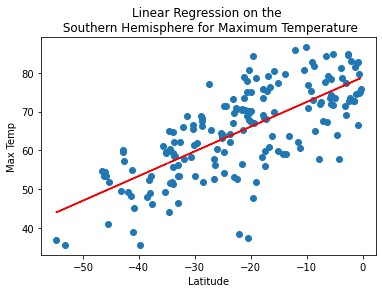

r = 0.725


In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

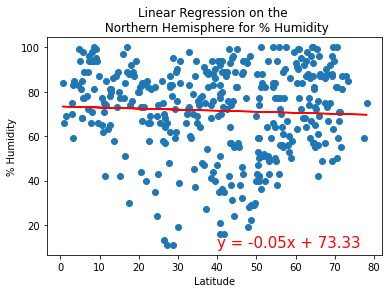

r = -0.047


In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

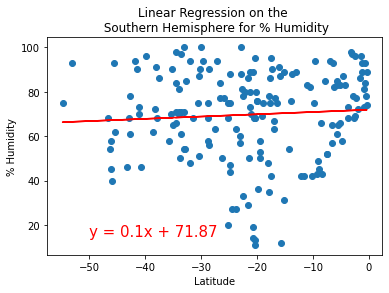

r = 0.067


In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))

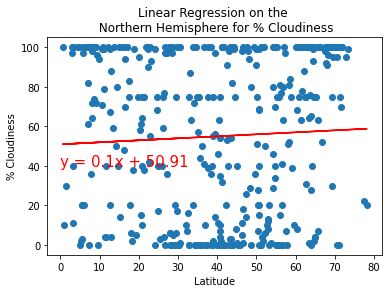

r = 0.051


In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(0,40))

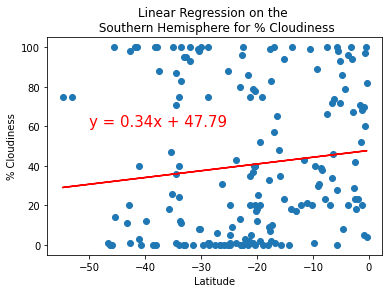

r = 0.120


In [34]:
# Linear regression on the Southren Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,60))

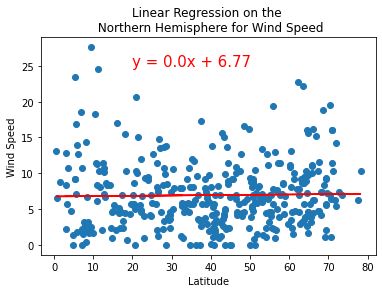

r = 0.020


In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(20,25))

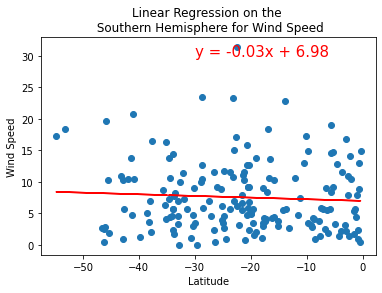

r = -0.062


In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-30,30))